## MI2 Online PCA and pre processing
###  LAMA group (Luisa, Ammar, Myriam)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.decomposition import PCA

## Exercise 1

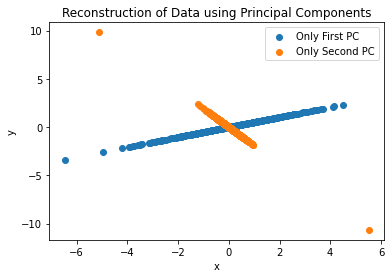

In [21]:
data = np.loadtxt('pca2.csv', delimiter = ',', skiprows= 1)
data_centered = data - np.mean(data, axis = 0)

# Determine the Principal Components
cov_matrix = np.cov(data_centered.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_indices]
sorted_eigenvectors = eigen_vectors[:,sorted_indices]


# first PC for reconstruction
first_pc = sorted_eigenvectors[:,0].reshape(-1,1)
reconstructed_data_first_pc = np.dot(data_centered, first_pc) * first_pc.T

# the second PC for reconstruction
second_pc = sorted_eigenvectors[:,1].reshape(-1,1)
reconstructed_data_second_pc = np.dot(data_centered, second_pc) * second_pc.T

# Plotting
plt.scatter(reconstructed_data_first_pc[:,0], reconstructed_data_first_pc[:,1], label="Only First PC")
plt.scatter(reconstructed_data_second_pc[:,0], reconstructed_data_second_pc[:,1], label="Only Second PC")
plt.title("Reconstruction of Data using Principal Components")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

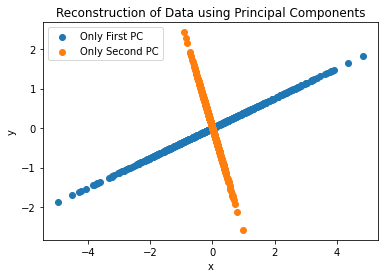

In [22]:
pca_2 = PCA(n_components=2)
data_substracted = np.delete(data_centered, [16,156], axis = 0)

# Determine the Principal Components
cov_matrix = np.cov(data_substracted.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_indices]
sorted_eigenvectors = eigen_vectors[:,sorted_indices]


# first PC for reconstruction
first_pc = sorted_eigenvectors[:,0].reshape(-1,1)
reconstructed_data_first_pc = np.dot(data_substracted, first_pc) * first_pc.T

# the second PC for reconstruction
second_pc = sorted_eigenvectors[:,1].reshape(-1,1)
reconstructed_data_second_pc = np.dot(data_substracted, second_pc) * second_pc.T

# Plotting
plt.scatter(reconstructed_data_first_pc[:,0], reconstructed_data_first_pc[:,1], label="Only First PC")
plt.scatter(reconstructed_data_second_pc[:,0], reconstructed_data_second_pc[:,1], label="Only Second PC")
plt.title("Reconstruction of Data using Principal Components")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


When removing the outliers, the data projected in the PCs space is more focused and represent the data better


## Exercise 2

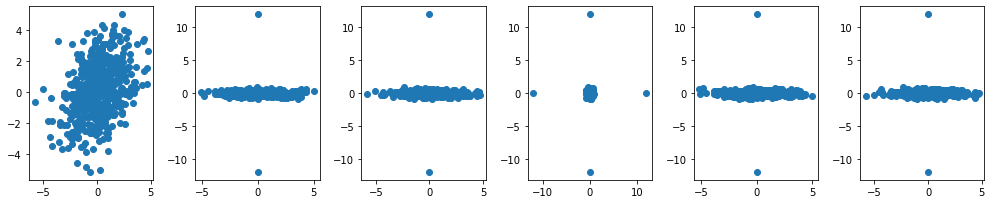

In [3]:
data_4 = np.loadtxt('pca4.csv', delimiter = ',', skiprows= 1)

fig,ax = plt.subplots(ncols = 6, figsize = (14,3))
fig.tight_layout()
ax[0].scatter(data_4[:,0], data_4[:,1])
ax[1].scatter(data_4[:,1], data_4[:,2])
ax[2].scatter(data_4[:,0], data_4[:,2])
ax[3].scatter(data_4[:,2], data_4[:,3])
ax[4].scatter(data_4[:,1], data_4[:,3])
ax[5].scatter(data_4[:,0], data_4[:,3])

plt.show()

Some of the data points are really not part of the cloud of the data : and they are in the dimension 3 and 4 and appear to all be higher than |10|

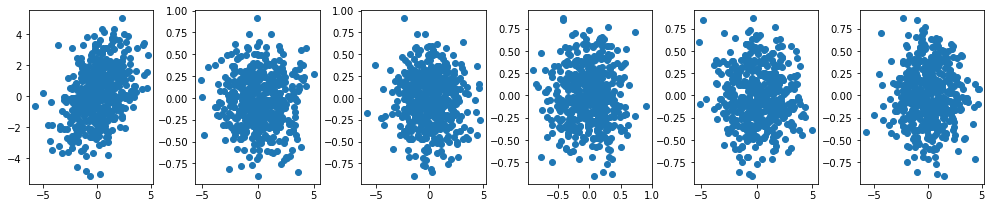

In [4]:
for i in range(496):
    m,j,k,l = data_4[i] 
    if abs(k)>10 or abs(l)>10:
        data_4 = np.delete(data_4, i, axis = 0)
    
fig,ax = plt.subplots(ncols = 6, figsize = (14,3))
fig.tight_layout()
ax[0].scatter(data_4[:,0], data_4[:,1])
ax[1].scatter(data_4[:,1], data_4[:,2])
ax[2].scatter(data_4[:,0], data_4[:,2])
ax[3].scatter(data_4[:,2], data_4[:,3])
ax[4].scatter(data_4[:,1], data_4[:,3])
ax[5].scatter(data_4[:,0], data_4[:,3])

plt.show()

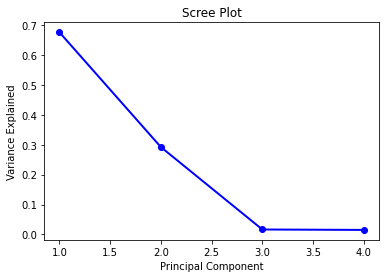

In [5]:
pca_4 = PCA()
pca_4.fit(data_4[0:300])


PC_values = np.arange(pca_4.n_components_) + 1
plt.plot(PC_values, pca_4.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [8]:
data_centered = data_4 -np.mean(data_4, axis = 0)
C = np.cov(data_centered.T)
v, M = np.linalg.eig(C)
D = np.diag(1/v**0.5)
data_sphered = D@M.T@data_centered.T

[Text(0.5, 1.0, 'Heatmap of C')]

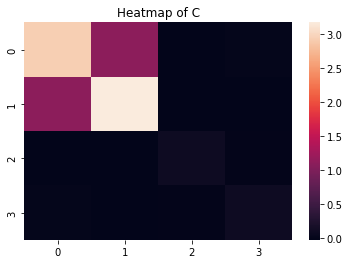

In [9]:
fig = sns.heatmap(C)
fig.set(title ='Heatmap of C')

[Text(0.5, 1.0, 'Heatmap of covariance matrix of projected data into PCs')]

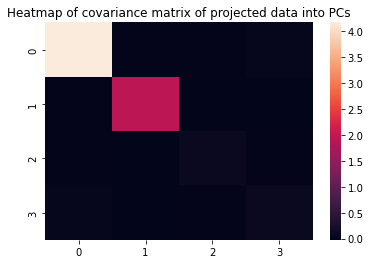

In [14]:
fig = sns.heatmap(np.cov(M@data_centered.T)) 
fig.set(title ='Heatmap of covariance matrix of projected data into PCs')

[Text(0.5, 1.0, 'Heatmap of covariance matrix of v')]

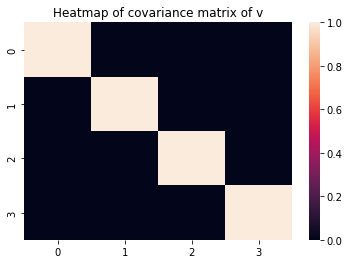

In [13]:
fig = sns.heatmap(np.cov(data_sphered)) 
fig.set(title ='Heatmap of covariance matrix of v')

## Exercise 4

In [25]:
groups = []
for i in range(1,11):
    groups.append([i]*200)
groups = np.array(groups).flatten()

<AxesSubplot:xlabel='V1', ylabel='V2'>

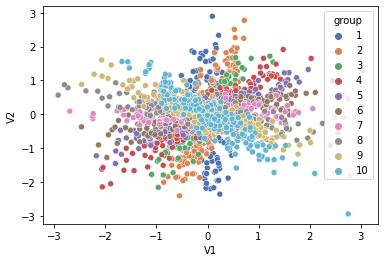

In [27]:
data = pd.read_csv('data-onlinePCA.txt', delimiter=',')
data['group'] = groups
sns.scatterplot(data = data , x ='V1', y= 'V2', hue='group', palette="deep")

In [29]:
def draw_vector(v0, v1, color,ax=None, ):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color = color)
    ax.annotate('', v1, v0, arrowprops=arrowprops, )

In [30]:
colors = sns.color_palette('deep')


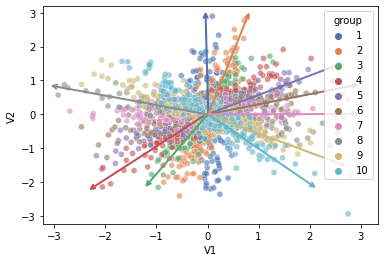

In [31]:
sns.scatterplot(data = data , x ='V1', y= 'V2', hue='group', palette="deep" , alpha=0.6)
gk = data.groupby('group')

for group in range(1,11):
    
    pca = PCA(n_components=1)
    pca.fit(gk.get_group(group)[['V1','V2']])

    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v, color = colors[group-1])
    # plt.axis('equal')

In [32]:
def oja_update(data,lr):
    weights = np.ones((data.shape[0]+1,data.shape[1]))
    for i in range(200):
        y = weights[i,:]@data[i]
        weights[i+1,:] = weights[i,:] + lr * y * (data[i] - y * weights[i])
    return weights
gk = data.groupby('group')
lr = [0.002, 0.04, 0.45]

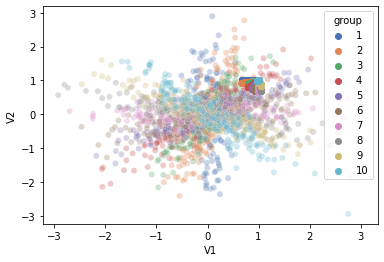

In [33]:

sns.scatterplot(data = data , x ='V1', y= 'V2', hue='group', palette="deep", alpha=0.3)
for group in range(1,11):
    data_arr = np.array(gk.get_group(group)[['V1','V2']])
    weights = oja_update(data_arr, lr[0])
    plt.scatter(weights[:,0],weights[:,1], alpha = 0.9, color=colors[group-1])

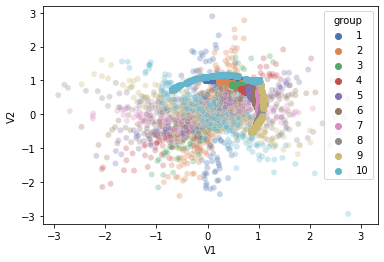

In [34]:

sns.scatterplot(data = data , x ='V1', y= 'V2', hue='group', palette="deep", alpha=0.3)
for group in range(1,11):
    data_arr = np.array(gk.get_group(group)[['V1','V2']])
    weights = oja_update(data_arr, lr[1])
    plt.scatter(weights[:,0],weights[:,1], alpha = 0.9, color=colors[group-1])

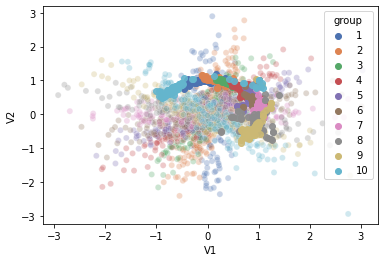

In [36]:

sns.scatterplot(data = data , x ='V1', y= 'V2', hue='group', palette="deep", alpha=0.3)
for group in range(1,11):
    data_arr = np.array(gk.get_group(group)[['V1','V2']])
    weights = oja_update(data_arr, lr[2])
    plt.scatter(weights[:,0],weights[:,1], alpha = 0.9, color=colors[group-1])